In [94]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [81]:
url = 'recuperados.csv'
#url="https://github.com/MinCiencia/Datos-COVID19/blob/master/input/Curvas_epi/activos%20vs%20recuperados.csv"
df = pd.read_csv(url)
df=pd.DataFrame(df.values, columns = ["date","activos","recuperados"])
df = df.loc[:,['date','recuperados']]
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
##Eliminamos las filas en las que los casos tenian un total de cero, dejando unicamente donde empezaron los contagios
df= df[df['recuperados'] != 0]
df

date recuperados
11     63           1
12     64           2
13     65           3
14     66          11
15     67          13
..    ...         ...
264   316      503523
265   317      505244
266   318      506707
267   319      508071
268   320      509400

[258 rows x 2 columns]

In [82]:
df.plot(x ='date', y='recuperados')

# 1. COMPARAR EL MODELO DE PREDICCION MATEMATICO VS PROBABILIDAD.

### MODELO PROBABILISTICO



In [145]:

filtro=df.iloc [:, 1] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
y = list(df.iloc [:, 1]) # Total casos
x = list(df.iloc [:, 0]) # Dias
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x,y)
plt.show()

### MODELO POLINOMIAL

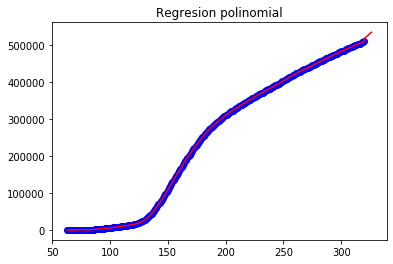

In [139]:
x1 = list(df.iloc [:, 0])
y1 = list(df.iloc [:, 1])
X = df.iloc[:, 0:1].values 
lin = LinearRegression() 
lin.fit(X, y1) 
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, y1) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y1) 
plt.scatter(X, y1, color = 'blue') 
X1 = np.array(range(max(x1),max(x1)+7))
for i in X1:
    x1.append(i)
pre = lin2.predict(poly.fit_transform(X1.reshape(-1, 1)))
for i in pre:
    if(i<0):
        i*-1
    y1.append(i)
plt.plot(x1, y1, color = 'r') 
plt.title('Regresion polinomial') 
plt.show()

### Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

### Modelo probabilistico

In [166]:
ant = df["recuperados"][:len(df)-7] # Filtro los datos que se empezo a tener casos
media = ant.mean()
mediana = ant.median()
print('Mediana Anterior:',mediana)
print('Media Anterior:',media)
y = list(df.iloc [:, 1]) # Total casos
x = list(df.iloc [:, 0]) # Dias

prediccion_anterior = int(y[-1] + mediana)
print('Prediccion anterior: ',prediccion_anterior)
anterior_p=y[-1]
print('Datos Reales')
for i in range(len(y)-7,len(y)):
    print('\t',y[i])

print('\nPredicción probabilística semana.')
for i in range(7):
    print('\t',anterior_p+ mediana)
    anterior_p=anterior_p+ mediana
    
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x,y)
plt.show()


Mediana Anterior: 277980.0
Media Anterior: 237211.49800796813
Prediccion anterior:  787380
787380
Datos Reales
	 501361
	 502434
	 503523
	 505244
	 506707
	 508071
	 509400

Predicción probabilística semana.
	 787380.0
	 1065360.0
	 1343340.0
	 1621320.0
	 1899300.0
	 2177280.0
	 2455260.0


### Modelo Matematico (Polinomial)


Datos Reales:
	 : 501361
	 : 502434
	 : 503523
	 : 505244
	 : 506707
	 : 508071
	 : 509400

Predicción matemática semana:
	:  505154
	:  507526
	:  509960
	:  512457
	:  515021
	:  517653
	:  520354


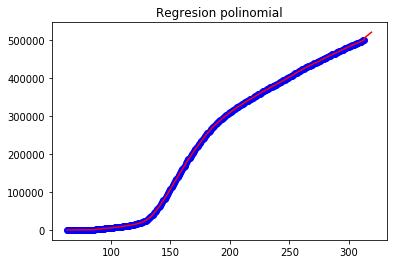

In [165]:
x1 = list(df.iloc [:len(df)-7, 0])
y1 = list(df.iloc [:len(df)-7, 1])
X = df.iloc[:len(df)-7, 0:1].values 
lin = LinearRegression() 
lin.fit(X, y1) 
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
poly.fit(X_poly, y1) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y1) 
plt.scatter(X, y1, color = 'blue') 
X1 = np.array(range(max(x1),max(x1)+7))
for i in X1:
    x1.append(i)
pre = lin2.predict(poly.fit_transform(X1.reshape(-1, 1)))
print ('\nDatos Reales:')
y_real=list(df.iloc [:,1])
for i in range(len(y_real)-7,len(y_real)):
    print ('\t :',y_real[i])
print ('\nPredicción matemática semana:')
for i in pre:
    print('\t: ',int(i))
    y1.append(i)
plt.plot(x1, y1, color = 'r') 
plt.title('Regresion polinomial') 
plt.show()


### ANALISIS

En el caso de modelos probabilísticos, debido a la naturaleza misma del modelo, las observaciones son sólo una muestra de la realidad, y en consecuencia una repetición del ensayo puede dar un resultado diferente. Resulta, pues, poco probable encontrar una correspondencia exacta entre modelo y realidad, aún cuando las hipótesis sean válidas. Por ello, es necesario definir la magnitud de la discrepancia que puede obtenerse sin que sea necesario desechar la hipótesis estudiada. Al ser la variable observada una variable aleatoria, pueden producirse grandes diferencias, aun cuando ello sea poco probable. Por otro lado, una correspondencia entre la predicción y la observación tampoco es suficiente para garantizar que la hipótesis sea cierta.

los resultados obtenidos con los datos de regresión polinomial de ordenación cuatro, son los que presentan menor desviación estándar, simplifican el tratamiento de datos, permitiendo un análisis más riguroso de los resultados.
 
### CONCLUSIONES

Mediante la regresión polinómica se reduce considerablemente los errores en el ajuste de la función que describe el comportamiento de la variable dependiente y así ajustar los valores a una función que los represente de manera correcta.

### CRITERIO PERSONAL

Al realizar la práctica podemos deducir que el uso de regresión polinomial para el ajuste de datos y estimacino de predicciones es más considerable que la probabilistica. Aunque de cierto modo no se apega a la realidad actual, debido a que no se consta con datos precisos.